<a href="https://colab.research.google.com/github/Rafaschreinert/portfolio_rafael/blob/main/E_Commerce/Notebook/E_Commerce_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Context**
Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

# **Content**
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

# **Acknowledgements**
Per the UCI Machine Learning Repository, this data was made available by Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

Image from stocksnap.io.

# **Inspiration**
Analyses for this dataset could include time series, clustering, classification and more.

In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos Rafa DS/E-Commerce Project/Dataset/ecommerce_dataset.csv', encoding= 'unicode_escape')

In [94]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **Data Cleaning**

## Data format cleaning

To simplify the further analysis, the columns will be renamed as snake case:

In [95]:
df.rename(columns={"InvoiceNo":"invoice_num", 
                   "StockCode":"stock_code", 
                  "Description":"description", 
                  "Quantity":"quantity", 
                  "InvoiceDate":"invoice_date", 
                  "UnitPrice":"unit_price", 
                  "CustomerID":"customer_id", 
                  "Country":"country"}, inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The column related to the transaction date will be converted from 'object' (a simple string basically) to the very convenient date format "date-time" in pandas.

In [97]:
df['invoice_date']=pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

The description column will be converter into lower case.

In [98]:
df['description']=df.description.str.lower()

In [99]:
df.head(15)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Checking null values

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There are some null values for description and customer id.
The number of missing values in each column is:

In [101]:
df.isnull().sum().sort_values(ascending=False)

customer_id     135080
description       1454
country              0
unit_price           0
invoice_date         0
quantity             0
stock_code           0
invoice_num          0
dtype: int64

The portion of dataframe where some values are missing is the following:

In [102]:
df_miss=df[df.isnull().any(axis=1)]
df_miss.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,decorative rose bathroom bottle,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,decorative cats bathroom bottle,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,polkadot rain hat,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,rain poncho retrospot,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


## Is there any relationship between the missing data?

In [103]:
df_miss["day"] = df_miss['invoice_date'].map(lambda x: x.day)
df_miss["month"] = df_miss['invoice_date'].map(lambda x: x.month)
df_miss["year"] = df_miss['invoice_date'].map(lambda x: x.year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [104]:
df_miss['daymonth']=df_miss['day'].astype(str)+'/'+df_miss['month'].astype(str)
df_miss['daymonthyear']=df_miss['daymonth'].astype(str)+'/'+df_miss['year'].astype(str)
df_miss['monthyear']=df_miss['month'].astype(str)+'/'+df_miss['year'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [105]:
df_miss.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,day,month,year,daymonth,daymonthyear,monthyear
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010
1443,536544,21773,decorative rose bathroom bottle,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010
1444,536544,21774,decorative cats bathroom bottle,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010
1445,536544,21786,polkadot rain hat,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010
1446,536544,21787,rain poncho retrospot,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1,12,2010,1/12,1/12/2010,12/2010


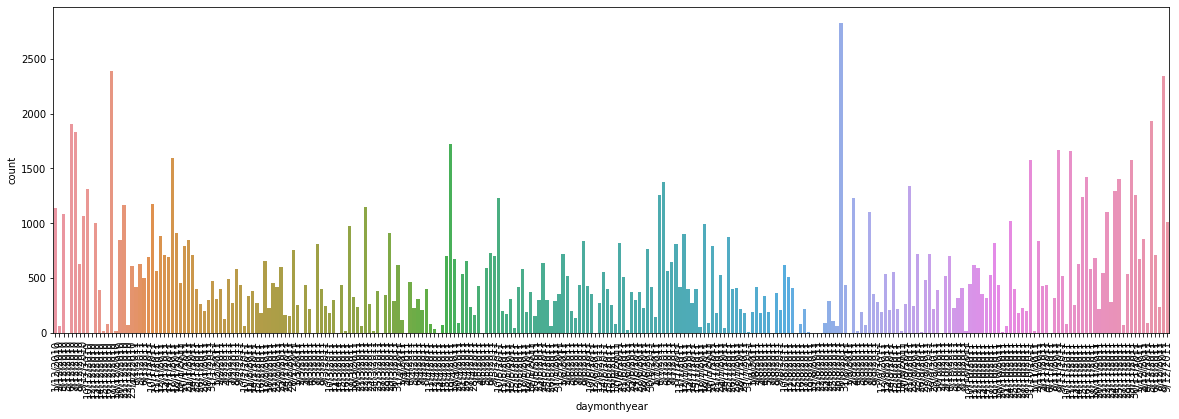

In [106]:
fig, ax = plt.subplots(figsize=(20,6)) 
ax = sns.countplot(x='daymonthyear', data=df_miss)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

This plot looks messy, but its clear that during some days there have been more missing values than others.
In particular the days with most missing values are:

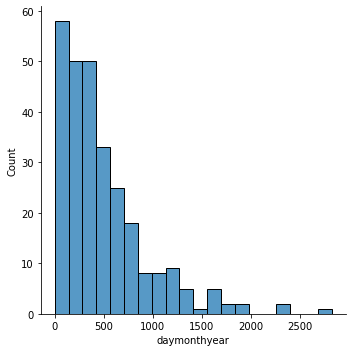

In [107]:
sns.displot(df_miss['daymonthyear'].value_counts())

We can see that during some days, more than 2500 customers_id are missing. We will now check the days where most cusomers id are missing.

In [108]:
df_miss['daymonthyear'].value_counts()[:20]

30/8/2011     2829
17/12/2010    2384
8/12/2011     2341
5/12/2011     1933
6/12/2010     1904
7/12/2010     1830
18/4/2011     1719
8/11/2011     1671
11/11/2011    1656
17/1/2011     1591
29/11/2011    1577
31/10/2011    1576
16/11/2011    1423
25/11/2011    1400
5/7/2011      1375
21/9/2011     1338
10/12/2010    1309
24/11/2011    1293
30/11/2011    1259
4/7/2011      1256
Name: daymonthyear, dtype: int64

It could be interesting to check if during these days something happend and caused the missing values.

---

For further analysis, the rows with missing values will be dropped and a new df called 'df_new' will be defined

In [109]:
df_new=df.dropna()

In [110]:
#check if there a are missing values in the new dataframe
df_new.isnull().sum().sort_values(ascending=False)

country         0
customer_id     0
unit_price      0
invoice_date    0
quantity        0
description     0
stock_code      0
invoice_num     0
dtype: int64

In [111]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Now the dataframe does not have any missing values

## Duplicated Values handling

In [112]:
df_new[df_new.duplicated()].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
517,536409,21866,union jack flag luggage tag,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,hand warmer scotty dog design,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,set 2 tea towels i love london,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,scottie dog hot water bottle,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,round snack boxes set of 4 skulls,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [113]:
df_new.duplicated().sum()

5225

There are 5225 duplicated transactions
These transaction will be dropped from the dataset.

In [114]:
df_new.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
df_new.duplicated().sum()

0

## Change columns type

Next, the 'customer_id' column will be converted to 'int' from 'float' since customersID are integer numbers.

In [116]:
df_new['customer_id']=df_new.customer_id.astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
df_new.describe()

,quantity,unit_price,customer_id
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


Quantity has negative values and unit price has a minimum value of 0

In [118]:
np.sum(df_new['quantity'] < 0)

8872

There are 8872 transactions with negative quantity. We will investigate if they are related to canceled orders or mistakes.

## Canceled orders analysis

In [119]:
canceled_orders = df_new[df_new['invoice_num'].apply(lambda x: x[0]=='C')]
canceled_orders.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


By analyzing the first 5 values of the dataframe we can see that the quantity has a negative values, is this true for all canceled orders?

In [120]:
(canceled_orders['quantity'] < 0).sum()

8872

Yes, as expetcted all the transactions with negative values are canceled orders.

In [121]:
print('The percentage of canceled orders is: {} %'.format(round(canceled_orders.shape[0]/df_new.shape[0]*100,2)))

The percentage of canceled orders is: 2.21 %


Moreover, it looks like there are some discounts among the canceled orders. They will be analyzed as well.

## Discounts

In [122]:
discounts = df_new[df_new['stock_code'].apply(lambda order: order=='D')]
discounts.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
9038,C537164,D,discount,-1,2010-12-05 13:21:00,29.29,14527,United Kingdom
14498,C537597,D,discount,-1,2010-12-07 12:34:00,281.00,15498,United Kingdom
19392,C537857,D,discount,-1,2010-12-08 16:00:00,267.12,17340,United Kingdom
31134,C538897,D,discount,-1,2010-12-15 09:14:00,5.76,16422,United Kingdom


In [123]:
discounts.shape

(77, 8)

The company issued 77 discounts

Are there other discounts in the original dataset?

In [124]:
df[df['stock_code'].apply(lambda order: order=='D')].shape[0]

77

No, all the discounts are correctly included in the transactions with negative values

Now, all the canceled orders will be dropped.

In [125]:
df_new = df_new[df_new['quantity'] > 0]
df_new.sort_values(by='stock_code', ascending=False, inplace=True)
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
299512,563100,POST,postage,6,2011-08-12 09:57:00,40.0,12381,Norway
224432,556526,POST,postage,1,2011-06-13 11:33:00,18.0,12732,France
186640,552874,POST,postage,7,2011-05-12 09:40:00,18.0,12621,Germany
103055,545051,POST,postage,1,2011-02-27 11:58:00,18.0,12599,France
477044,577046,POST,postage,7,2011-11-17 13:46:00,18.0,12449,Belgium


## Check for transactions of special items:

The presence of special items will be checked through a regex

In [126]:
import re
spec_list=[]
for code in df_new.stock_code:
    x=re.findall(r"^\w{1}$|\D[A-Z]+\D|[A-Z]\d", code)
    if x not in spec_list:
        if len(x) >0 :
            spec_list.append(x)
spec_list

[['POST'], ['PADS'], ['M'], ['DOT'], ['C2'], ['BANK ', 'CHARGES']]

['BANK ', 'CHARGES'] will be renamed into ['BANK CHARGES']:

In [127]:
spec_list[5] = ['BANK CHARGES']

Then, the spec_list will be transformed into into a single list:

In [128]:
spec_list2=[item for sublist in spec_list for item in sublist]
spec_list2

['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES']

Now it is possible to check all the transactions related to these special items:

In [129]:
df_new[df_new['stock_code'].apply(lambda x: x in spec_list2)]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
299512,563100,POST,postage,6,2011-08-12 09:57:00,40.0,12381,Norway
224432,556526,POST,postage,1,2011-06-13 11:33:00,18.0,12732,France
186640,552874,POST,postage,7,2011-05-12 09:40:00,18.0,12621,Germany
103055,545051,POST,postage,1,2011-02-27 11:58:00,18.0,12599,France
477044,577046,POST,postage,7,2011-11-17 13:46:00,18.0,12449,Belgium
...,...,...,...,...,...,...,...,...
327921,565735,BANK CHARGES,bank charges,1,2011-09-06 12:25:00,15.0,16904,United Kingdom
62508,541505,BANK CHARGES,bank charges,1,2011-01-18 15:58:00,15.0,15939,United Kingdom
440745,574546,BANK CHARGES,bank charges,1,2011-11-04 14:59:00,15.0,13651,United Kingdom
506357,579137,BANK CHARGES,bank charges,1,2011-11-28 12:51:00,15.0,14704,United Kingdom


There are so other types of transactions included in the dataset. They will be dropped.
The special transations are: POST ( postage), M ( manual), Bank charges and C2 ( carriage)

In [130]:
df_new = df_new[~df_new['stock_code'].isin(spec_list2)]

In [131]:
print("The number of transactions is: ", df_new.shape[0])

The number of transactions is:  391183


392732-391183=1549 elements have been dropped

# **Feature Engineering**

Adding a column 'Amount spent'

In [132]:
df_new['amount_spent']=df_new['quantity'] * df_new['unit_price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,amount_spent
527069,580691,90214Z,"letter ""z"" bling key ring",12,2011-12-05 15:48:00,0.29,13790,United Kingdom,3.48
193006,553503,90214Y,"letter ""y"" bling key ring",1,2011-05-17 13:20:00,1.25,14606,United Kingdom,1.25
527068,580691,90214Y,"letter ""y"" bling key ring",12,2011-12-05 15:48:00,0.29,13790,United Kingdom,3.48
532744,580996,90214Y,"letter ""y"" bling key ring",48,2011-12-06 17:18:00,0.29,14578,United Kingdom,13.92
527067,580691,90214W,"letter ""w"" bling key ring",12,2011-12-05 15:48:00,0.29,13790,United Kingdom,3.48


Reordering the columns for easier reference

In [134]:
df_new=df_new[['invoice_num', 'invoice_date', 'stock_code', 'description', 'quantity', 'unit_price', 'amount_spent', 'customer_id', 'country']]

In [135]:
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
527069,580691,2011-12-05 15:48:00,90214Z,"letter ""z"" bling key ring",12,0.29,3.48,13790,United Kingdom
193006,553503,2011-05-17 13:20:00,90214Y,"letter ""y"" bling key ring",1,1.25,1.25,14606,United Kingdom
527068,580691,2011-12-05 15:48:00,90214Y,"letter ""y"" bling key ring",12,0.29,3.48,13790,United Kingdom
532744,580996,2011-12-06 17:18:00,90214Y,"letter ""y"" bling key ring",48,0.29,13.92,14578,United Kingdom
527067,580691,2011-12-05 15:48:00,90214W,"letter ""w"" bling key ring",12,0.29,3.48,13790,United Kingdom


Creating columns for day, month, year

In [136]:
df_new.insert(loc=2, column='yearmonth', value=df_new['invoice_date'].map(lambda x: 100 * x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek) + 1) # +1 is used to make Monday=1.....until Sunday=7
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

In [137]:
df_new.head()

,invoice_num,invoice_date,yearmonth,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,customer_id,country
527069,580691,2011-12-05 15:48:00,201112,12,1,15,90214Z,"letter ""z"" bling key ring",12,0.29,3.48,13790,United Kingdom
193006,553503,2011-05-17 13:20:00,201105,5,2,13,90214Y,"letter ""y"" bling key ring",1,1.25,1.25,14606,United Kingdom
527068,580691,2011-12-05 15:48:00,201112,12,1,15,90214Y,"letter ""y"" bling key ring",12,0.29,3.48,13790,United Kingdom
532744,580996,2011-12-06 17:18:00,201112,12,2,17,90214Y,"letter ""y"" bling key ring",48,0.29,13.92,14578,United Kingdom
527067,580691,2011-12-05 15:48:00,201112,12,1,15,90214W,"letter ""w"" bling key ring",12,0.29,3.48,13790,United Kingdom


Now the dataset looks cleaner and is ready for EDA

# **Exploratory Data Analysis (EDA)**

In [138]:
orders=df_new.groupby(by=['customer_id','country'], as_index=False)['invoice_num'].count()
orders.head()

,customer_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,27
3,12349,Italy,72
4,12350,Norway,16


The column invoice_num has the count of invoice_num for each customer

The equivalent code in SQL would be:

SELECT customer_id, country, count(invoice_num)

FROM df_new

GROUP BY customer_id, country

ORDER BY customer_id;

Ploting the number of order by customer_id

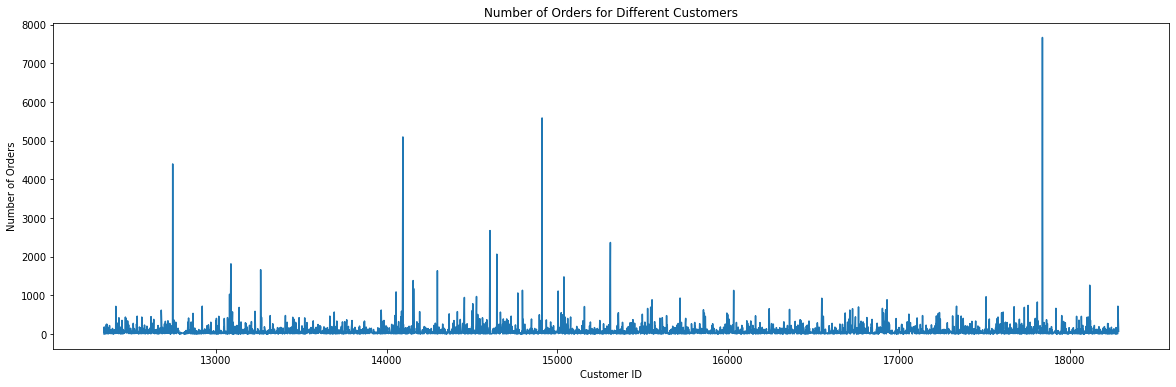

In [139]:
plt.subplots(figsize=(20,6))
plt.plot(orders.customer_id, orders.invoice_num)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Different Customers')
plt.show()

## The TOP 5 Lowest number of orders is:

From where comes the customer with the lowest number of orders? (show top 5 )

In [140]:
orders.sort_values(by='invoice_num', ascending=True).head()

,customer_id,country,invoice_num
0,12346,United Kingdom,1
2442,15657,United Kingdom,1
522,13017,United Kingdom,1
4097,17948,United Kingdom,1
2451,15668,United Kingdom,1


The 5 lowests number of orders are from UK.

## The TOP 5 Most number of orders is:

- From where comes the customer with the highest number of orders?(show top 5)

In [141]:
orders.sort_values(by='invoice_num', ascending=False).head()

,customer_id,country,invoice_num
4016,17841,United Kingdom,7667
1888,14911,EIRE,5586
1298,14096,United Kingdom,5095
334,12748,United Kingdom,4397
1670,14606,United Kingdom,2674


The customers with highests numbers of orders are from UK and EIRE.

## How much money spent by the customers?

In [142]:
money_spent = df_new.groupby(by=['customer_id','country'], as_index=False)['amount_spent'].sum()
money_spent.head()

,customer_id,country,amount_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1437.24
3,12349,Italy,1457.55
4,12350,Norway,294.40


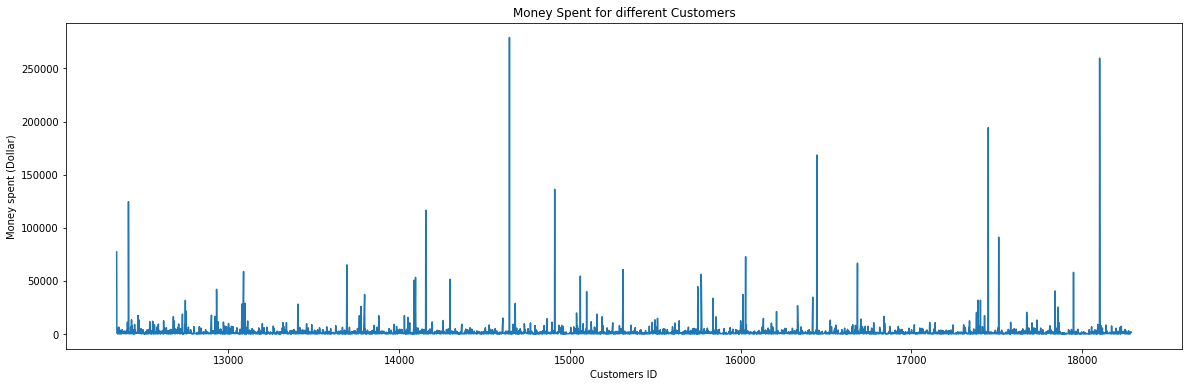

In [143]:
plt.subplots(figsize=(20,6))
plt.plot(money_spent.customer_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

From where comes the customer with the highest total money spent on purchases? (show top 5 )

In [144]:
money_spent.sort_values(by='amount_spent', ascending=False).head()

,customer_id,country,amount_spent
1698,14646,Netherlands,279138.02
4206,18102,United Kingdom,259657.30
3734,17450,United Kingdom,194390.79
3015,16446,United Kingdom,168472.50
1888,14911,EIRE,136161.83


The customers with the highest total money spent on purchases are from Netherlands, UK, EIRE.

## Discover Patterns

In [145]:
df_new['yearmonth'].unique()

array([201112, 201105, 201106, 201012, 201111, 201102, 201101, 201104,
       201103, 201109, 201107, 201110, 201108])

Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)

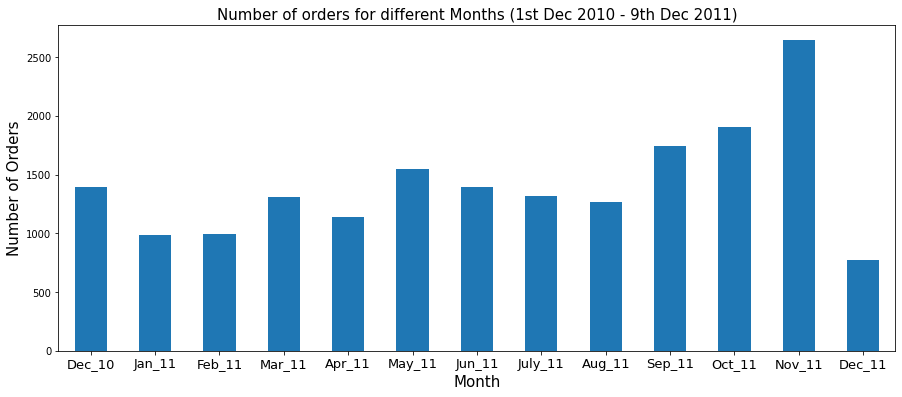

In [153]:
ax = df_new.groupby('invoice_num')['yearmonth'].unique().value_counts().sort_index().plot(kind='bar', figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

November 2011 looks like the month with most sales, maybe because it's the Black Friday's month. And December 2011 with the loest number of sales, probably because we don't have the full data of the month.

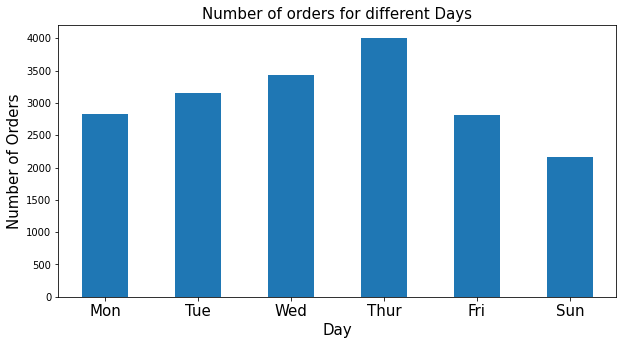

In [155]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(10,5))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

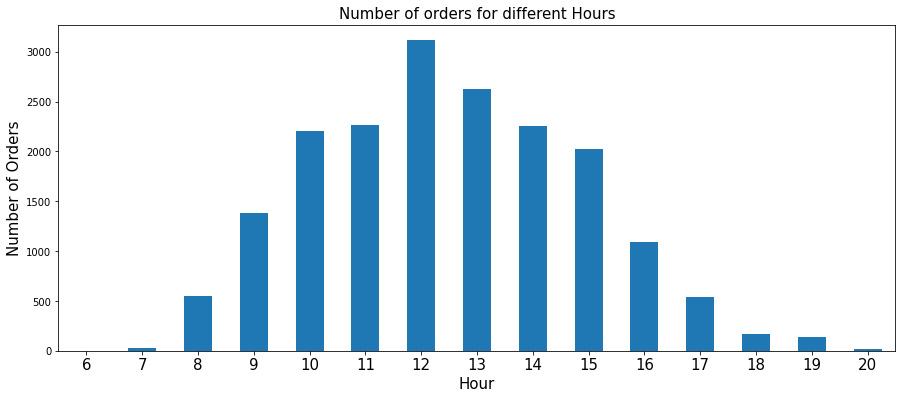

In [160]:
ax = df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

Midday looks like the hour with most sales. Maybe people like buying at lunch time.

## What is the average ticket?

In [187]:
ticket_value = df_new.groupby(by=['invoice_num'], as_index=False)['amount_spent'].sum()
ticket_value.head()

,invoice_num,amount_spent
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


In [202]:
#sum(amount_spent) / total of invoice_num
average_ticket=ticket_value['amount_spent'].sum()/len(ticket_value['invoice_num'])
print('The average ticket is:', average_ticket)

The average ticket is: 474.72032817169253


In [185]:
ticket_value['amount_spent'].mean()

474.7203281716922

The average ticket is 474.72